 We will be building a simple image classifier using multi layered Perceptrons for this exercise. The dataset used is Fashion MNISt which is a collection of 70,000 grayscale images of 28x28 pixels each, with 10 classes.

In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
# Training set contains 60,000 images and testing contains 10,000, however we have kept the last 5000 from 
#training for validation.

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

 The pixel intensities are represented in a range of 0 to 255. Hence, we divide them by 255 to scale them all to values between 0 and 1.

In [9]:
X_train, X_valid , X_test = X_train/255. , X_valid/255. , X_test/255.  

In [11]:
class_names = ["T shirt","Trouser", "Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
class_names[y_train[0]] # where y_train[0] return a number between 0 and 9.

'Ankle boot'

In [13]:
tf.random.set_seed(42)

Every set of random numbers generated is based on an initial value called seed. Random numbers are generated based on an algorithm, where for the same seed value, you will always get the same sequence of numbers. Setting random_seed(42) ensures that the same set of numbers are generated on subsequent calls of the function. By doing tensorflow.random.set_seed(42), we make sure that the random weights and biases of the NN that we start with remains the same for all calls of the function.

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation = "relu"))
model.add(tf.keras.layers.Dense(100,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[-0.02823967, -0.05251091,  0.00268169, ...,  0.04971076,
        -0.03119501,  0.04921806],
       [-0.03942334,  0.00151687, -0.03145033, ...,  0.03966175,
         0.0261376 ,  0.0242289 ],
       [ 0.04294941,  0.05061601, -0.02235479, ...,  0.05828425,
         0.05466367,  0.05763708],
       ...,
       [ 0.02335439,  0.07257515,  0.01948071, ...,  0.07402043,
         0.07019635,  0.02423441],
       [ 0.03445707,  0.01015666, -0.04744163, ..., -0.04319565,
        -0.04775066,  0.04063372],
       [-0.01180972,  0.03952505,  0.05082303, ...,  0.02231713,
         0.05075026, -0.07056437]], dtype=float32)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [23]:
history = model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid))

Epoch 1/30


2024-07-08 18:26:42.077376: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7199 - accuracy: 0.7614 - val_loss: 0.5069 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4894 - accuracy: 0.8310 - val_loss: 0.4604 - val_accuracy: 0.8352
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8447 - val_loss: 0.4248 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4158 - accuracy: 0.8540 - val_loss: 0.3949 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3941 - accuracy: 0.8609 - val_loss: 0.3890 - val_accuracy: 0.8574
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8663 - val_loss: 0.3861 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3649 - accuracy: 0.8702 - val_loss: 0.3646 - val_accuracy: 0.8700
Epo

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

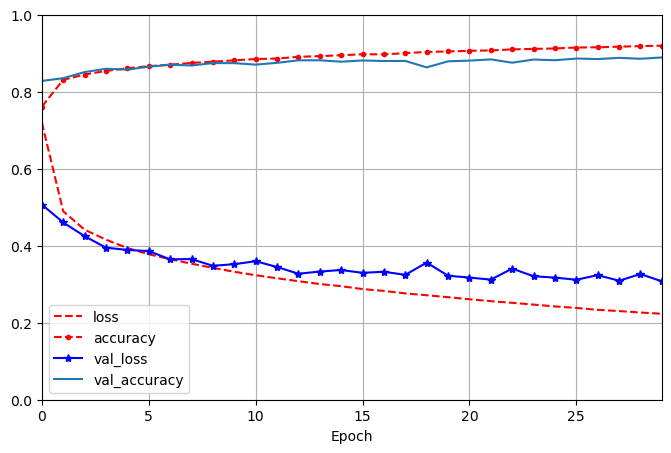

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim = [0,29],ylim = [0,1],grid=True,xlabel = "Epoch", style = ["r--","r--.","b-*"])
plt.show()

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 859us/step - loss: 0.3250 - accuracy: 0.8835


[0.32496339082717896, 0.8834999799728394]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
import numpy as np

In [29]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')